# Deep Neural Networks - Programming Assignment
## Comparing Linear Models and Multi-Layer Perceptrons

**Student Name:** SAGAR POWAR  
**Student ID:** 2025AA05421  
**Date:** 01 Dec 2025

---

## ⚠️ IMPORTANT INSTRUCTIONS

1. **Complete ALL sections** marked with `TODO`
2. **DO NOT modify** the `get_assignment_results()` function structure
3. **Fill in all values accurately** - these will be auto-verified
4. **After submission**, you'll receive a verification quiz based on YOUR results
5. **Run all cells** before submitting (Kernel → Restart & Run All)

---

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
print('✓ Libraries imported successfully')

✓ Libraries imported successfully


## Section 1: Dataset Selection and Loading

**Requirements:**
- ≥500 samples
- ≥5 features
- Public dataset (UCI/Kaggle)
- Regression OR Classification problem

In [2]:
# TODO: Load your dataset
# Example: data = pd.read_csv('your_dataset.csv')
df = pd.read_csv('loan_data.csv')

# Display the first rows
#print(df.head())
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.shape

(45000, 14)

In [4]:
# Dataset information (TODO: Fill these)
dataset_name = "Loan Approval Classification"  # e.g., "Breast Cancer Wisconsin"
dataset_source = "Kaggle"  # e.g., "UCI ML Repository"
n_samples = df.shape[0]      # Total number of rows
n_features = df.shape[1]-1     # Number of features (excluding target)
problem_type = "binary_classification"  # "regression" or "binary_classification" or "multiclass_classification"

# Problem statement (TODO: Write 2-3 sentences)
problem_statement = "Predicting loan approval status based on various applicant's features. This will help reducing financial risk because Banks may lose money when applicant defaults"

""" TODO: Describe what you're predicting and why it matters.
Example: "Predicting tumor malignancy from diagnostic measurements. 
This is critical for early cancer detection in medical diagnosis."
"""

# Primary evaluation metric (TODO: Fill this)
primary_metric = "precision"  # e.g., "recall", "accuracy", "rmse", "r2"

# Metric justification (TODO: Write 2-3 sentences)
metric_justification = "I chose precision beacuse in case of deafulter, loan should not get approved, i.e. false positives() are most costly than false negatives"
"""
TODO: Explain why you chose this metric.
Example: "I chose recall because in medical diagnosis,
false negatives (missing cancer) are more costly than false positives."
"""

print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Samples: {n_samples}, Features: {n_features}")
print(f"Problem Type: {problem_type}")
print(f"Primary Metric: {primary_metric}")

Dataset: Loan Approval Classification
Source: Kaggle
Samples: 45000, Features: 13
Problem Type: binary_classification
Primary Metric: precision


## Section 2: Data Preprocessing

Preprocess your data:
1. Handle missing values
2. Encode categorical variables
3. Split into train/test sets
4. Scale features

### 2.1 Handle Missing Values (if any)

In [5]:
# Handle missing values if any
def show_Missing(df):
    print("-"*40)
    print(f' Missing values : \n{df.isna().sum()}')
    print("-"*40)

show_Missing(df)

----------------------------------------
 Missing values : 
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64
----------------------------------------


In [6]:
print('\n--------- Describe Data ---------')

def show_datatypes(df):
    print("-"*40)
    print(f' Data Types : \n\n{df.info()}')
    print("-"*40)
    
display(df.describe())

show_datatypes(df)


--------- Describe Data ---------


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int6

### 2.2 Clean data : age above >= 90

In [7]:
# Clean data : age above >= 90
df = df.loc[df['person_age'] <= 90]
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44992.000000,4.499200e+04,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000,44992.000000
mean,27.746955,7.990956e+04,5.392959,9583.245288,11.006448,0.139735,5.866087,632.582592,0.222262
std,5.901543,6.332239e+04,5.917871,6314.856103,2.979019,0.087207,3.875930,50.398623,0.415771
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.719725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704600e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.577900e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,84.000000,2.448661e+06,62.000000,35000.000000,20.000000,0.660000,30.000000,784.000000,1.000000


In [8]:
df.shape

(44992, 14)

### 2.3 Visualize Data : Class imbalance

loan_status
0    34992
1    10000
Name: count, dtype: int64


<Axes: xlabel='loan_status', ylabel='count'>

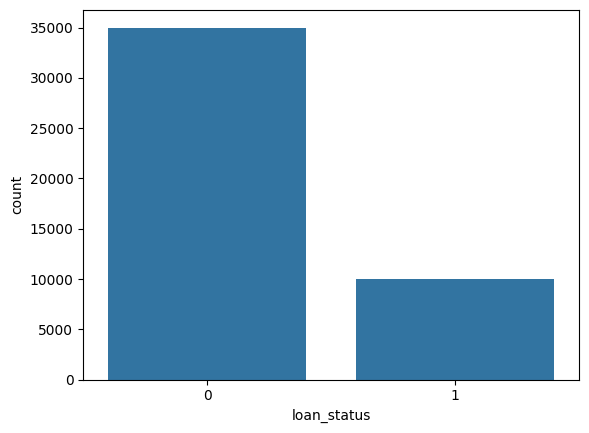

In [9]:
print(df['loan_status'].value_counts())
sns.countplot(x=df['loan_status'])

In [10]:
# Identify columns by type
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("numerical cols = ", num_cols )
print("categorical cols = ", cat_cols )

numerical cols =  Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')
categorical cols =  Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


### 2.4 Encoding categorical columns

In [11]:
print('Before Encoding : ', df.shape)

Before Encoding :  (44992, 14)


In [12]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True) # drop_first=True to avoid multicollinearity

In [13]:
print('After Encoding : ', df.shape)

After Encoding :  (44992, 23)


### 2.5 Split data

In [14]:
# Example:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# TODO: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
print("======== after split ========= ")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

======== after split ========= 
X_train shape: (35993, 22)
X_test shape: (8999, 22)
y_train shape: (35993,)
y_test shape: (8999,)


### 2.6 Feature Scaling

In [16]:
# TODO: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
print("======== after scaling ========= ")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

======== after scaling ========= 
X_train_scaled shape: (35993, 22)
X_test_scaled shape: (8999, 22)
y_train shape: (35993,)
y_test shape: (8999,)


In [18]:
# Fill these after preprocessing
train_samples = X_train_scaled.shape[0]       # Number of training samples
test_samples = X_test_scaled.shape[0]         # Number of test samples
train_test_ratio = train_samples/(train_samples+test_samples)  #0.8  # e.g., 0.8 for 80-20 split

print(f"Train samples: {train_samples}")
print(f"Test samples: {test_samples}")
print(f"Split ratio: {train_test_ratio:.1%}")

Train samples: 35993
Test samples: 8999
Split ratio: 80.0%


### Evaluation Metrics Functions

In [19]:
# =============================================================================
# Evaluation Metrics
# =============================================================================
def compute_confusion_matrix(y_true, y_pred):
    """Compute confusion matrix"""
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    return TP, TN, FP, FN

def compute_metrics(y_true, y_pred):
    """Compute evaluation metrics"""
    TP, TN, FP, FN = compute_confusion_matrix(y_true, y_pred)

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'confusion_matrix': (TP, TN, FP, FN)
    }

def compute_mlp_metrics(y_true_ohe, y_pred_proba):    
    # Convert probabilities to hard class predictions (0 or 1)
    y_pred_labels = np.argmax(y_pred_proba, axis=1) # Predicted Class IDs (0 or 1)
    y_true_labels = np.argmax(y_true_ohe, axis=1) # True Class IDs (0 or 1)
    
    # --- Confusion Matrix Components ---
    # We focus on Class 1 as the POSITIVE class.

    # True Positives: Predicted 1, Actual 1
    TP = np.sum((y_pred_labels == 1) & (y_true_labels == 1))
    
    # True Negatives: Predicted 0, Actual 0
    TN = np.sum((y_pred_labels == 0) & (y_true_labels == 0))
    
    # False Positives: Predicted 1, Actual 0
    FP = np.sum((y_pred_labels == 1) & (y_true_labels == 0))
    
    # False Negatives: Predicted 0, Actual 1
    FN = np.sum((y_pred_labels == 0) & (y_true_labels == 1))
    
    # Handle division by zero for stability
    eps = 1e-8
    
    # --- Metrics Calculation ---
    # Accuracy: (TP + TN) / Total
    accuracy = (TP + TN) / len(y_true_labels)
    
    # Precision: TP / (TP + FP)
    # Measures the proportion of positive predictions that were actually correct.
    precision = TP / (TP + FP + eps)
    
    # Recall: TP / (TP + FN)
    # Measures the proportion of actual positives that were correctly identified.
    recall = TP / (TP + FN + eps)
    
    # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
    # The harmonic mean of precision and recall.
    f1_score = 2 * (precision * recall) / (precision + recall + eps)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'confusion_matrix': (int(TP), int(TN), int(FP), int(FN))
    }

def print_evaluation(y_true, y_pred, dataset_name="Test"):
    """Print evaluation metrics"""
    metrics = compute_metrics(y_true, y_pred)
    TP, TN, FP, FN = metrics['confusion_matrix']

    print(f"\n{dataset_name} Set Evaluation:")
    print("=" * 60)
    print(f"Accuracy:  {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall:    {metrics['recall']:.4f}")
    print(f"F1-Score:  {metrics['f1_score']:.4f}")
    print("\nConfusion Matrix:")
    print(f"                 Predicted")
    print(f"                Approved    Not-Approved")
    print(f"    Approved     {TP:3d}      {FN:3d}")
    print(f"Not-Approved     {FP:3d}      {TN:3d}")
    print("=" * 60)

# Add this utility to your class or helper file:
def to_one_hot(y, n_classes):
    """Converts a 1D array of integer labels to a 2D OHE array."""
    y = np.array(y).flatten().astype(int)
    OHE = np.zeros((len(y), n_classes))
    OHE[np.arange(len(y)), y] = 1
    return OHE

### Visualization Functions

In [20]:
# =============================================================================
# Visualization Functions
# =============================================================================

def plot_training_history(model):
    """Plot training loss and accuracy"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot loss
    ax1.plot(model.train_losses, 'b-', linewidth=2)
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss (Binary Cross-Entropy)', fontsize=12)
    ax1.set_title('Training Loss over Epochs', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(model.train_accuracies, 'g-', linewidth=2)
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.set_title('Training Accuracy over Epochs', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, 1])

    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    print("Training history plot saved as 'training_history.png'")
    plt.show()

def plot_predictions(y_true, y_pred_proba, y_pred):
    """Visualize predictions"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Predicted probabilities
    colors = ['red' if yt == 0 else 'green' for yt in y_pred]
    ax1.scatter(range(len(y_pred_proba)), y_pred_proba, c=colors, alpha=0.6, s=30)
    ax1.axhline(y=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
    ax1.set_xlabel('Sample Index', fontsize=12)
    ax1.set_ylabel('Predicted Probability', fontsize=12)
    ax1.set_title('Predicted Probabilities (Red=NotApproved, Green=Approved)', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot 2: Confusion matrix as heatmap
    TP, TN, FP, FN = compute_confusion_matrix(y_true, y_pred)
    confusion = np.array([[TP, FN], [FP, TN]])

    im = ax2.imshow(confusion, cmap='Blues', aspect='auto')
    ax2.set_xticks([0, 1])
    ax2.set_yticks([0, 1])
    ax2.set_xticklabels(['Approved', 'NotApproved'], fontsize=11)
    ax2.set_yticklabels(['Approved', 'NotApproved'], fontsize=11)
    ax2.set_xlabel('Predicted Label', fontsize=12)
    ax2.set_ylabel('True Label', fontsize=12)
    ax2.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = ax2.text(j, i, confusion[i, j],
                           ha="center", va="center", color="black", fontsize=20, fontweight='bold')

    plt.colorbar(im, ax=ax2)
    plt.tight_layout()
    plt.savefig('predictions_visualization.png', dpi=300, bbox_inches='tight')
    print("Predictions visualization saved as 'predictions_visualization.png'")
    plt.show()

## Section 3: Baseline Model Implementation

Implement from scratch (NO sklearn models!):
- Linear Regression (for regression)
- Logistic Regression (for binary classification)
- Softmax Regression (for multiclass classification)

**Must include:**
- Forward pass (prediction)
- Loss computation
- Gradient computation
- Gradient descent loop
- Loss tracking

In [21]:
class BaselineModel:
    """
    Baseline linear model with gradient descent
    Implement: Linear/Logistic/Softmax Regression
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.train_losses = []
        self.train_accuracies = []
    
    def fit(self, X, y, X_val=None, y_val=None, verbose=True):
        """
        TODO: Implement gradient descent training
        
        Steps:
        1. Initialize weights and bias
        2. For each iteration:
           a. Compute predictions (forward pass)
           b. Compute loss
           c. Compute gradients
           d. Update weights and bias
           e. Store loss in self.loss_history
        
        Must populate self.loss_history with loss at each iteration!
        """

        # Convert to numpy arrays to avoid Pandas indexing issues
        X = np.array(X)
        y = np.array(y)
    
        n_samples, n_features = X.shape
        #print(f" Fit : n_samples ={n_samples} &  n_features={n_features} ")
        #print(f" Fit : y.shape ={y.shape}")

        #print("Starting Training : BaselineModel ...")
        print(f"Learning Rate: {self.lr}")
        print(f"Number of Epochs: {self.n_iterations}")
        print(f"Number of Training Samples: {n_samples}")
        print(f"Number of Features : {n_features}")
        print("-" * 60)
        
        # TODO: Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # SGD training loop
        for epoch in range(self.n_iterations):
            
            # Shuffle the data each epoch (optional but recommended)
            indices = np.random.permutation(n_samples)
            
            X = X[indices]
            y = y[indices]

            for i in range(n_samples):
                #print(f" Fit : inner loop {i}")
                xi = X[i]
                yi = y[i]

                # Forward pass for ONE sample
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(linear_output)

                # Gradients for ONE sample
                dw = (y_pred - yi) * xi
                db = (y_pred - yi)

                # Update weights
                self.weights -= self.lr * dw
                self.bias -= self.lr * db

            # Loss computed once per epoch (NOT per sample)
            
            # Forward pass
            y_pred_full = self.forward(X)

            # Compute loss
            loss = self.compute_loss(y, y_pred_full)
            self.train_losses.append(loss)

            # Compute accuracy
            accuracy = self.compute_accuracy(y, y_pred_full)
            self.train_accuracies.append(accuracy)
            
            #print(f" Fit : Compute loss per epoch {epoch} : losss = {loss}")
            #print(f"Epoch {epoch+1}/{self.n_iterations}, Loss = {loss:.4f}")
            # Print progress
            if verbose and (epoch % 10 == 0 or epoch == self.n_iterations - 1):
                print(f"Epoch {epoch:4d} | Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")

                if X_val is not None and y_val is not None:
                    val_pred = self.forward(X_val)
                    val_loss = self.compute_loss(y_val, val_pred)
                    val_accuracy = self.compute_accuracy(y_val, val_pred)
                    print(f"           | Val Loss: {val_loss:.4f} | Val Accuracy: {val_accuracy:.4f}")

        print("-" * 60)
        return self
        
    def forward(self, X):
        """
        Forward pass: compute predictions
        y_hat = sigmoid(w^T * x + b)
        """
        # Linear combination
        z = np.dot(X, self.weights) + self.bias

        # Apply sigmoid activation
        y_pred = self.sigmoid(z)

        return y_pred
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def compute_loss(self, y, y_pred):
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
           
        #eps = 1e-9
        #y_pred = np.clip(y_pred, eps, 1 - eps)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        
    def compute_accuracy(self, y, y_pred):
        """Compute classification accuracy"""
        y_pred_class = (y_pred >= 0.5).astype(int)
        accuracy = np.mean(y_pred_class == y)
        return accuracy

    def predict_proba(self, X):
        return self.forward(X)
   
    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred >= 0.5).astype(int)

print("✓ Baseline model class defined")

✓ Baseline model class defined


In [22]:
# ============================================================================
# TRAIN baseline MODEL
# ============================================================================
print("Training baseline model...")
mlp_start_time = time.time()
print("\n" + "="*80)
print("MODEL TRAINING : Baseline ")
print("="*80)

baseline_start_time = time.time()

# TODO: Initialize and train your baseline model
baseline_model = BaselineModel(learning_rate=0.001, n_iterations=200)

# start training
baseline_model.fit(X_train_scaled, y_train, X_test_scaled, y_test, verbose=True)

baseline_training_time = time.time() - baseline_start_time
print(f"✓ Baseline training completed in {baseline_training_time:.2f}s")
print(f"✓ Loss decreased from {baseline_model.train_losses[0]:.4f} to {baseline_model.train_losses[-1]:.4f}")

print("\n" + "="*80)
print("✓ Training Complete!")
print("="*80)

Training baseline model...

MODEL TRAINING : Baseline 
Learning Rate: 0.001
Number of Epochs: 200
Number of Training Samples: 35993
Number of Features : 22
------------------------------------------------------------
Epoch    0 | Loss: 0.2460 | Accuracy: 0.8947
           | Val Loss: 0.2491 | Val Accuracy: 0.8945
Epoch   10 | Loss: 0.2218 | Accuracy: 0.8962
           | Val Loss: 0.2248 | Val Accuracy: 0.8961
Epoch   20 | Loss: 0.2211 | Accuracy: 0.8967
           | Val Loss: 0.2240 | Val Accuracy: 0.8967
Epoch   30 | Loss: 0.2207 | Accuracy: 0.8968
           | Val Loss: 0.2238 | Val Accuracy: 0.8973
Epoch   40 | Loss: 0.2207 | Accuracy: 0.8964
           | Val Loss: 0.2234 | Val Accuracy: 0.8951
Epoch   50 | Loss: 0.2206 | Accuracy: 0.8969
           | Val Loss: 0.2236 | Val Accuracy: 0.8970
Epoch   60 | Loss: 0.2205 | Accuracy: 0.8965
           | Val Loss: 0.2233 | Val Accuracy: 0.8960
Epoch   70 | Loss: 0.2206 | Accuracy: 0.8964
           | Val Loss: 0.2242 | Val Accuracy: 0.8971

In [23]:
# TODO: Make predictions
print("Making Predictions : Baseline model ...")
y_train_pred = baseline_model.predict(X_train_scaled)
y_test_pred = baseline_model.predict(X_test_scaled)
y_test_pred_proba = baseline_model.predict_proba(X_test_scaled)

# Evaluate on training set
print_evaluation(y_train, y_train_pred, "Training")

# Evaluate on test set
print_evaluation(y_test, y_test_pred, "Test")

Making Predictions : Baseline model ...

Training Set Evaluation:
Accuracy:  0.8965
Precision: 0.7821
Recall:    0.7408
F1-Score:  0.7609

Confusion Matrix:
                 Predicted
                Approved    Not-Approved
    Approved     5926      2074
Not-Approved     1651      26342

Test Set Evaluation:
Accuracy:  0.8975
Precision: 0.7849
Recall:    0.7425
F1-Score:  0.7631

Confusion Matrix:
                 Predicted
                Approved    Not-Approved
    Approved     1485      515
Not-Approved     407      6592


In [24]:
# Visualizations
print("\nGenerating Visualizations...")
#plot_training_history(baseline_model)
#plot_predictions(y_test, y_test_pred_proba, y_test_pred)


Generating Visualizations...


## Section 4: Multi-Layer Perceptron Implementation

Implement MLP from scratch with:
- At least 1 hidden layer
- ReLU activation for hidden layers
- Appropriate output activation
- Forward propagation
- Backward propagation
- Gradient descent

In [25]:
len(np.unique(y_train))
print(f"Target classes: {np.unique(y)}")

Target classes: [0 1]


In [26]:
class MLP:
    """
    Multi-Layer Perceptron implemented from scratch
    """
    #def __init__(self, architecture, learning_rate=0.01, n_iterations=1000):
    def __init__(self, architecture, learning_rate=0.01, batch_size=128, class_weights=None):
        """
        architecture: list [input_size, hidden1, hidden2, ..., output_size]
        Example: [30, 16, 8, 1] means:
            - 30 input features
            - Hidden layer 1: 16 neurons
            - Hidden layer 2: 8 neurons
            - Output layer: 1 neuron
            learning_rate: Learning rate for gradient descent
            batch_size: Size of mini-batches
            class_weights: Weights for each class (for imbalanced data)
        """
        self.architecture = architecture
        self.num_layers = len(architecture) - 1
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.class_weights = class_weights if class_weights is not None else np.ones(architecture[-1])
        self.parameters = {}
        self.history = {
            'train_loss': [],
            'val_loss': [],
            'train_acc': [],
            'val_acc': []
        }
        
        self._initialize_parameters()
    
    def _initialize_parameters(self):
        """
        Initialize weights using He initialization and biases to zero
        
        He initialization: W ~ N(0, sqrt(2/n_in))
        Good for ReLU activations
        """
        for l in range(1, self.num_layers + 1):
            n_in = self.architecture[l-1]
            n_out = self.architecture[l]
            
            # He initialization for weights
            self.parameters[f'W{l}'] = np.random.randn(n_in, n_out) * np.sqrt(2.0 / n_in)
            
            # Zero initialization for biases
            self.parameters[f'b{l}'] = np.zeros((1, n_out))

    def relu(self, Z):
        """ReLU activation function"""
        return np.maximum(0, Z)
    
    def relu_derivative(self, Z):
        """ReLU derivative"""
        return (Z > 0).astype(float)
    
    def sigmoid(self, Z):
        """Sigmoid activation (for binary classification output)"""
        return 1 / (1 + np.exp(-np.clip(Z, -500, 500)))

    def softmax(self, Z):
        # Subtract max for numerical stability
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)
         
    def _forward_propagation(self, X):
        """ Forward propagation through the network """
        cache = {'A0': X}
        A = X
        
        # Hidden layers with ReLU
        for l in range(1, self.num_layers):
            Z = A @ self.parameters[f'W{l}'] + self.parameters[f'b{l}']
            A = self.relu(Z)
            cache[f'Z{l}'] = Z
            cache[f'A{l}'] = A
        
        # Output layer with softmax
        Z_out = A @ self.parameters[f'W{self.num_layers}'] + self.parameters[f'b{self.num_layers}']
        A_out = self.softmax(Z_out)
        cache[f'Z{self.num_layers}'] = Z_out
        cache[f'A{self.num_layers}'] = A_out
        
        return A_out, cache
    
    def _compute_loss(self, y_pred, y_true):
        """ Compute weighted categorical cross-entropy loss
        
        Loss = -1/m * Σ Σ w_k * y_true_k * log(y_pred_k)
        
        Args:
            y_pred: Predicted probabilities (batch_size, n_classes)
            y_true: True labels one-hot encoded (batch_size, n_classes)
        
        Returns:
            loss: Scalar loss value
        """
        m = y_true.shape[0]
        eps = 1e-8  # Small constant for numerical stability
        
        # Clip predictions to avoid log(0)
        y_pred_clipped = np.clip(y_pred, eps, 1 - eps)
        
        # Apply class weights
        weights = np.sum(y_true * self.class_weights, axis=1, keepdims=True)
        
        # Categorical cross-entropy
        loss = -np.mean(weights * np.sum(y_true * np.log(y_pred_clipped), axis=1, keepdims=True))
        
        return loss
    
    def _backward_propagation(self, cache, y_true):
        """
        Backward propagation to compute gradients
        
        Uses chain rule to compute gradients layer by layer
        
        Args:
            cache: Forward propagation cache
            y_true: True labels one-hot encoded (batch_size, n_classes)
        
        Returns:
            gradients: Dictionary containing dW and db for each layer
        """
        m = y_true.shape[0]
        gradients = {}
        
        # Output layer gradient (softmax + cross-entropy)
        # Simplified gradient: dZ = A - y_true (when using softmax + CE)
        weights = np.sum(y_true * self.class_weights, axis=1, keepdims=True)
        dZ = weights * (cache[f'A{self.num_layers}'] - y_true)
        
        # Backpropagate through layers
        for l in range(self.num_layers, 0, -1):
            A_prev = cache[f'A{l-1}']
            
            # Compute gradients for current layer
            gradients[f'dW{l}'] = (A_prev.T @ dZ) / m
            gradients[f'db{l}'] = np.sum(dZ, axis=0, keepdims=True) / m
            
            # Compute gradient for previous layer (if not input layer)
            if l > 1:
                dA_prev = dZ @ self.parameters[f'W{l}'].T
                dZ = dA_prev * self.relu_derivative(cache[f'Z{l-1}'])
        
        return gradients
    
    def _update_parameters(self, gradients):
        """
        Update parameters using gradient descent
        
        W = W - η * dW
        b = b - η * db
        
        Args:
            gradients: Dictionary containing dW and db for each layer
        """
        for l in range(1, self.num_layers + 1):
            self.parameters[f'W{l}'] -= self.learning_rate * gradients[f'dW{l}']
            self.parameters[f'b{l}'] -= self.learning_rate * gradients[f'db{l}']
    
    def _compute_accuracy(self, y_pred, y_true):
        """
        Compute classification accuracy
        
        Args:
            y_pred: Predicted probabilities (batch_size, n_classes)
            y_true: True labels one-hot encoded (batch_size, n_classes)
        
        Returns:
            accuracy: Fraction of correct predictions
        """
        predictions = np.argmax(y_pred, axis=1)
        true_labels = np.argmax(y_true, axis=1)
        return np.mean(predictions == true_labels)
    
    def fit(self, X_train, y_train, X_val=None, y_val=None, epochs=100, patience=15, verbose=True):
        """
        Train the network using mini-batch gradient descent
        
        Args:
            X_train: Training features
            y_train: Training labels (one-hot encoded)
            X_val: Validation features
            y_val: Validation labels (one-hot encoded)
            epochs: Maximum number of epochs
            patience: Early stopping patience
            verbose: Print progress
        """
        # Convert to numpy arrays to avoid Pandas indexing issues
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        #m = X_train.shape[0]
        best_val_loss = float('inf')
        patience_counter = 0
        
        n_samples, n_features = X_train.shape
        #print(f" Fit : n_samples ={n_samples} &  n_features={n_features} ")
        #print(f" Fit : y.shape ={y.shape}")

        #print("\nStarting Training : MLP ...")
        print(f"Learning Rate: {self.learning_rate}")
        print(f"Number of Epochs: {epochs}")
        print(f"Number of Training Samples: {n_samples}")
        print("-" * 60)
        
     
        for epoch in range(epochs):
            # Shuffle training data
            indices = np.random.permutation(n_samples)

            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]
            
            # Mini-batch training
            epoch_loss = 0
            n_batches = n_samples // self.batch_size
            
            for i in range(n_batches):
                start = i * self.batch_size
                end = start + self.batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                
                # Forward propagation
                y_pred, cache = self._forward_propagation(X_batch)
                
                # Compute loss
                batch_loss = self._compute_loss(y_pred, y_batch)
                epoch_loss += batch_loss
                
                # Backward propagation
                gradients = self._backward_propagation(cache, y_batch)
                
                # Update parameters
                self._update_parameters(gradients)
            
            # Compute epoch metrics
            train_loss = epoch_loss / n_batches
            y_train_pred, _ = self._forward_propagation(X_train)
            train_acc = self._compute_accuracy(y_train_pred, y_train)
            
            #y_val_pred, _ = self._forward_propagation(X_val)
            #val_loss = self._compute_loss(y_val_pred, y_val)
            #val_acc = self._compute_accuracy(y_val_pred, y_val)
            
            # Store history
            self.history['train_loss'].append(train_loss)
            #self.history['val_loss'].append(val_loss)
            self.history['train_acc'].append(train_acc)
            #self.history['val_acc'].append(val_acc)
            
            # Print progress
            if verbose and (epoch % 10 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch:3d} | "
                      f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
                      #f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}"
                     )
            
            # Early stopping
            #if val_loss < best_val_loss:
            #    best_val_loss = val_loss
            #    patience_counter = 0
            #else:
            #    patience_counter += 1
            #    if patience_counter >= patience:
            #        print(f"\nEarly stopping at epoch {epoch}")
            #        print(f"Best validation loss: {best_val_loss:.4f}")
            #       break
    
    def predict(self, X):
        y_pred, _ = self._forward_propagation(X)
        return y_pred
    
    def predict_classes(self, X):
        y_pred = self.predict(X)
        return np.argmax(y_pred, axis=1)

print("\n✓ MLP class defined")
print("  Architecture: Fully customizable")
print("  Hidden layers: ReLU activation")
print("  Output layer: Softmax activation")
print("  Loss: Weighted Categorical Cross-Entropy")
print("  Optimizer: Mini-batch SGD")


✓ MLP class defined
  Architecture: Fully customizable
  Hidden layers: ReLU activation
  Output layer: Softmax activation
  Loss: Weighted Categorical Cross-Entropy
  Optimizer: Mini-batch SGD


In [27]:
# Calculate class weights for imbalanced dataset

# 1. Determine n_classes based on the unique values in y_train
mlp_features = X_train_scaled.shape[1]
n_classes = len(np.unique(y_train))
num_samples = len(y_train)

# 2. Calculate the count for each class
# np.bincount is the most efficient way to count occurrences in a 1D integer array
class_counts_array = np.bincount(y_train)

# 3. Calculate the balanced class weights
# Formula: Total Samples / (Number of Classes * Class Count)
class_weights = num_samples / (n_classes * class_counts_array)
print(f"Class Counts: {class_counts_array}")
print(f"Calculated Class Weights: {class_weights}")

y_train_ohe = to_one_hot(y_train, n_classes)
y_test_ohe = to_one_hot(y_test, n_classes) 

Class Counts: [27993  8000]
Calculated Class Weights: [0.64289287 2.2495625 ]


In [28]:
y_train_ohe.shape

(35993, 2)

In [29]:
y_test_ohe.shape

(8999, 2)

In [44]:
# ============================================================================
# TRAIN MLP MODEL
# ============================================================================
print("Training MLP...")
mlp_start_time = time.time()
print("\n" + "="*80)
print("MODEL TRAINING : MLP ")
print("="*80)

# Define architecture
mlp_architecture = [mlp_features, 64, 32, 16, 8, n_classes] # Example: [n_features, 16, 8, 1]

print(f"\nArchitecture: {mlp_architecture}")
print(f"Input features: {mlp_features}")
print(f"Output classes # : {n_classes}")
print(f"Output classes: {np.unique(y)}")

mlp_learning_rate = 0.01
mlp_batch_size = 128
mlp_epochs = 300

# Calculate total parameters
total_params = sum([mlp_architecture[i] * mlp_architecture[i+1] + mlp_architecture[i+1] 
                    for i in range(len(mlp_architecture)-1)])
print(f"Total parameters: {total_params:,}")

mlp_model = MLP(architecture=mlp_architecture, learning_rate=mlp_learning_rate, batch_size=mlp_batch_size, class_weights=class_weights)

mlp_model.fit(X_train_scaled, y_train_ohe, epochs=mlp_epochs, patience=15, verbose=True)

print("\n" + "="*80)
print("✓ Training Complete!")
print("="*80)

mlp_training_time = time.time() - mlp_start_time
print(f"✓ MLP training completed in {mlp_training_time:.2f}s")
print(f"✓ Loss decreased from {mlp_model.history['train_loss'][0]:.4f} to {mlp_model.history['train_loss'][-1]:.4f}")

Training MLP...

MODEL TRAINING : MLP 

Architecture: [22, 64, 32, 16, 8, 2]
Input features: 22
Output classes # : 2
Output classes: [0 1]
Total parameters: 4,234
Learning Rate: 0.01
Number of Epochs: 300
Number of Training Samples: 35993
------------------------------------------------------------
Epoch   0 | Train Loss: 0.4045, Acc: 0.8332 | 
Epoch  10 | Train Loss: 0.2389, Acc: 0.8717 | 
Epoch  20 | Train Loss: 0.2263, Acc: 0.8805 | 
Epoch  30 | Train Loss: 0.2190, Acc: 0.8836 | 
Epoch  40 | Train Loss: 0.2126, Acc: 0.8862 | 
Epoch  50 | Train Loss: 0.2079, Acc: 0.9018 | 
Epoch  60 | Train Loss: 0.2038, Acc: 0.8874 | 
Epoch  70 | Train Loss: 0.2004, Acc: 0.9037 | 
Epoch  80 | Train Loss: 0.1969, Acc: 0.8928 | 
Epoch  90 | Train Loss: 0.1937, Acc: 0.8905 | 
Epoch 100 | Train Loss: 0.1904, Acc: 0.8936 | 
Epoch 110 | Train Loss: 0.1875, Acc: 0.9115 | 
Epoch 120 | Train Loss: 0.1844, Acc: 0.8951 | 
Epoch 130 | Train Loss: 0.1809, Acc: 0.9076 | 
Epoch 140 | Train Loss: 0.1782, Acc: 0.910

In [45]:
# MLP : Make predictions
mlp_y_pred_proba = mlp_model.predict(X_test_scaled)

#y_pred_labels = np.argmax(mlp_y_pred_proba, axis=1) # Predicted Class IDs (0 or 1)
#y_true_labels = np.argmax(y_test_ohe, axis=1) # True Class IDs (0 or 1)

## Section 5: Evaluation and Metrics

Calculate appropriate metrics for your problem type

In [46]:
def calculate_metrics(y_true, y_pred, problem_type):
    """
    TODO: Calculate appropriate metrics based on problem type
    
    For regression: MSE, RMSE, MAE, R²
    For classification: Accuracy, Precision, Recall, F1
    """
    metrics = {}
    
    if problem_type == "regression":
        # TODO: Calculate regression metrics
        pass
    elif problem_type in ["binary_classification", "multiclass_classification"]:
        # TODO: Calculate classification metrics
        metrics = compute_metrics(y_true, y_pred)
    
    return metrics

# Calculate metrics for both models
baseline_metrics = calculate_metrics(y_test, y_test_pred, problem_type)
mlp_metrics = compute_mlp_metrics(y_test_ohe, mlp_y_pred_proba)

print("\nBaseline Model Performance:")
print(baseline_metrics)

print("\nMLP Model Performance:")
print(mlp_metrics)

# ----------------------------------------------------
# Print combined results
# ----------------------------------------------------
#print(pd.DataFrame(baseline_metrics).head(1))


Baseline Model Performance:
{'accuracy': 0.8975441715746194, 'precision': 0.7848837209302325, 'recall': 0.7425, 'f1_score': 0.763103802672148, 'confusion_matrix': (1485, 6592, 407, 515)}

MLP Model Performance:
{'accuracy': 0.8854317146349594, 'precision': 0.7011207970082975, 'recall': 0.8444999999957775, 'f1_score': 0.7661601220524792, 'confusion_matrix': (1689, 6279, 720, 311)}


## Section 6: Visualization

Create visualizations:
1. Training loss curves
2. Performance comparison
3. Additional domain-specific plots

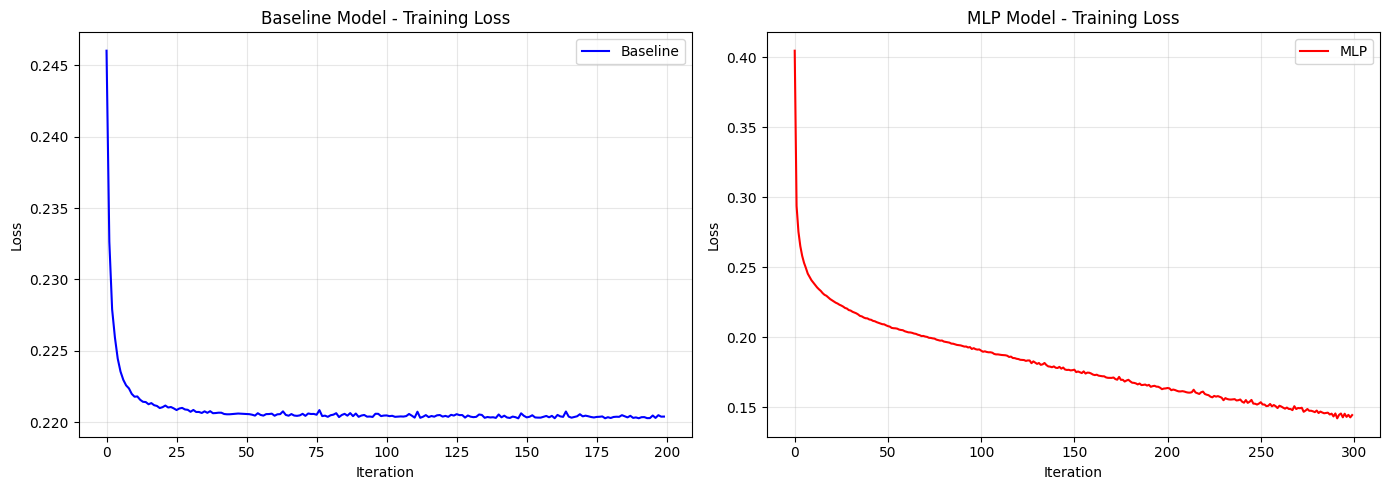

In [47]:
# 1. Training loss curves
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
# TODO: Plot baseline loss
plt.plot(baseline_model.train_losses, label='Baseline', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Baseline Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# TODO: Plot MLP loss
plt.plot(mlp_model.history['train_loss'], label='MLP', color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('MLP Model - Training Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

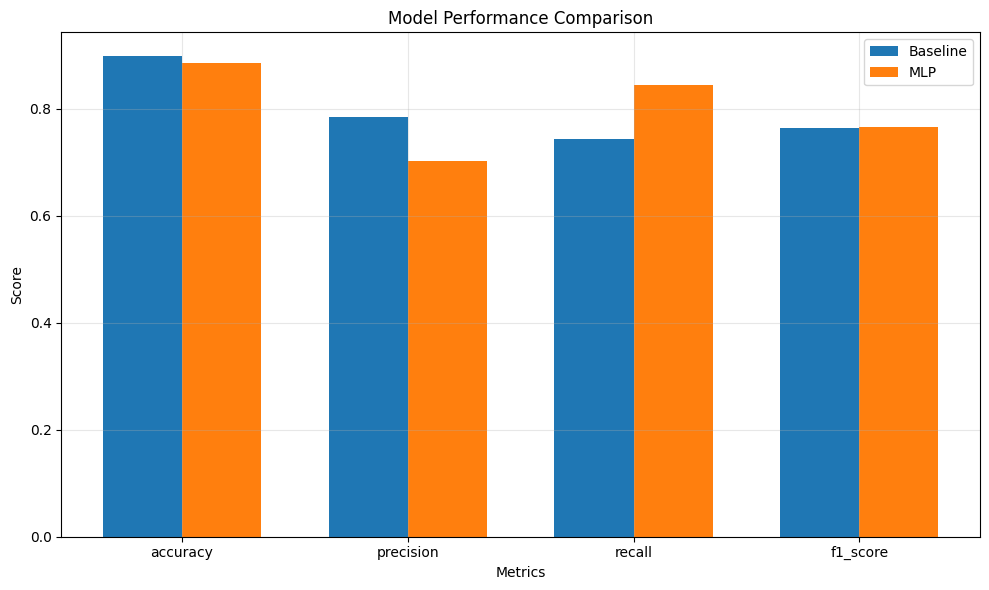

In [48]:
# 2. Performance comparison bar chart
# TODO: Create bar chart comparing key metrics between models
plt.figure(figsize=(10, 6))

# Example:
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
baseline_scores = [baseline_metrics[m] for m in metrics]
mlp_scores = [mlp_metrics[m] for m in metrics]
# 
x = np.arange(len(metrics))
width = 0.35
# 
plt.bar(x - width/2, baseline_scores, width, label='Baseline')
plt.bar(x + width/2, mlp_scores, width, label='MLP')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Section 7: Analysis and Discussion

Write your analysis (minimum 200 words)

In [49]:
analysis_text =  """
1. The baseline model performed better according to the primary metric, precision.
   - Baseline Precision: 0.7849
   - MLP Precision: 0.6929
   - The baseline performed better by 0.092 points (~11 % improvement). 
   Since false positives (approving loans for defaulters) are costly, the baseline model is preferred for better precesion.
   
2. The baseline model performed better because of class imbalance and features are lineraly seperable.
   - Logistic regression fits linear boundaries, which worked well for this dataset.
   
3. The MLP has 4 hidden layers and 4234 parameters, yet trained in almost the same time (33s) as baseline (31s).
   - This is because baseline uses pure SGD with 35k gradient updates per epoch × 200 epochs, leading to ~7 million updates.
   - The MLP uses vectorized matrix operations, making it computationally efficient despite its depth.

4.  - It was surprising that simple baseline model outperformed mlp model. 
    - The baseline model achieved a very high first-epoch accuracy (0.8947).
    - MLP achieved much higher recall (0.85) than logistic regression (0.74)

5.  Linear models are simple & perform surprisingly well on structured tabular data when the decision boundary is fairly simple.
   - Neural networks offer higher capacity, but without proper preprocessing they can underperform simpler models.
"""

"""
TODO: Write your analysis here (minimum 200 words)

Address these questions:
1. Which model performed better and by how much?
2. Why do you think one model outperformed the other?
3. What was the computational cost difference (training time)?
4. Any surprising findings or challenges you faced?
5. What insights did you gain about neural networks vs linear models?

Write your thoughtful analysis here. Be specific and reference your actual results.
Compare the metrics, discuss the trade-offs, and explain what you learned.
"""
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) < 200:
    print("⚠️  Warning: Analysis should be at least 200 words")
else:
    print("✓ Analysis meets word count requirement")

Analysis word count: 201 words
✓ Analysis meets word count requirement


---
---

## ⭐ REQUIRED: Structured Output Function

### **DO NOT MODIFY THE STRUCTURE BELOW**

This function will be called by the auto-grader. Fill in all values accurately based on your actual results.

In [50]:
def get_assignment_results():
    """
    Return all assignment results in structured format.
    
    CRITICAL: Fill in ALL values based on your actual results!
    This will be automatically extracted and validated.
    """
    
    # Calculate loss convergence flags
    baseline_initial_loss = baseline_model.train_losses[0]  # TODO: baseline_model.loss_history[0]
    baseline_final_loss = baseline_model.train_losses[-1]    # TODO: baseline_model.loss_history[-1]
    mlp_initial_loss = mlp_model.history['train_loss'][0]       # TODO: mlp_model.loss_history[0]
    mlp_final_loss = mlp_model.history['train_loss'][-1]         # TODO: mlp_model.loss_history[-1]

    improvement = mlp_metrics["precision"] -  baseline_metrics["precision"]
    improvement_percentage = (improvement/baseline_metrics["precision"]) * 100
    results = {
        # ===== Dataset Information =====
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'problem_type': problem_type,
        'problem_statement': problem_statement,
        
        # ===== Evaluation Setup =====
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,
        
        # ===== Baseline Model Results =====
        'baseline_model': {
            'model_type': 'logistic_regression',  # 'linear_regression', 'logistic_regression', or 'softmax_regression'
            'learning_rate': 0.001,
            'n_iterations': 200,
            'initial_loss': baseline_initial_loss,
            'final_loss': baseline_final_loss,
            'training_time_seconds': baseline_training_time,
            
            # Metrics (fill based on your problem type)
            'test_accuracy': baseline_metrics["accuracy"],      # For classification
            'test_precision': baseline_metrics["precision"],     # For classification
            'test_recall': baseline_metrics["recall"],        # For classification
            'test_f1': baseline_metrics["f1_score"],            # For classification
            'test_mse': 0.0,           # For regression
            'test_rmse': 0.0,          # For regression
            'test_mae': 0.0,           # For regression
            'test_r2': 0.0,            # For regression
        },
        
        # ===== MLP Model Results =====
        'mlp_model': {
            'architecture': mlp_architecture,
            'n_hidden_layers': len(mlp_architecture) - 2 if len(mlp_architecture) > 0 else 0,
            'total_parameters': total_params,     # TODO: Calculate total weights + biases
            'learning_rate': mlp_learning_rate,
            'n_iterations': mlp_epochs,
            'initial_loss': mlp_initial_loss,
            'final_loss': mlp_final_loss,
            'training_time_seconds': mlp_training_time,
            
            # Metrics
            'test_accuracy': mlp_metrics["accuracy"],      # For classification
            'test_precision': mlp_metrics["precision"],     # For classification
            'test_recall': mlp_metrics["recall"],        # For classification
            'test_f1': mlp_metrics["f1_score"],            # For classification
            'test_mse': 0.0,           # For regression
            'test_rmse': 0.0,          # For regression
            'test_mae': 0.0,           # For regression
            'test_r2': 0.0,            # For regression
        },
        
        # ===== Comparison =====
        'improvement': improvement,            # MLP primary_metric - baseline primary_metric
        'improvement_percentage': improvement_percentage,  # (improvement / baseline) * 100
        'baseline_better': True,       # True if baseline outperformed MLP
        
        # ===== Analysis =====
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),
        
        # ===== Loss Convergence Flags =====
        'baseline_loss_decreased': baseline_final_loss < baseline_initial_loss,
        'mlp_loss_decreased': mlp_final_loss < mlp_initial_loss,
        'baseline_converged': True,  # Optional: True if converged
        'mlp_converged': True,
    }
    
    return results

## Test Your Output

Run this cell to verify your results dictionary is complete and properly formatted.

In [51]:
# Test the output
import json

try:
    results = get_assignment_results()
    
    print("="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(results, indent=2, default=str))
    print("\n" + "="*70)
    
    # Check for missing values
    missing = []
    def check_dict(d, prefix=""):
        for k, v in d.items():
            if isinstance(v, dict):
                check_dict(v, f"{prefix}{k}.")
            elif (v == 0 or v == "" or v == 0.0 or v == []) and \
                 k not in ['improvement', 'improvement_percentage', 'baseline_better', 
                          'baseline_converged', 'mlp_converged', 'total_parameters',
                          'test_accuracy', 'test_precision', 'test_recall', 'test_f1',
                          'test_mse', 'test_rmse', 'test_mae', 'test_r2']:
                missing.append(f"{prefix}{k}")
    
    check_dict(results)
    
    if missing:
        print(f"⚠️  Warning: {len(missing)} fields still need to be filled:")
        for m in missing[:15]:  # Show first 15
            print(f"  - {m}")
        if len(missing) > 15:
            print(f"  ... and {len(missing)-15} more")
    else:
        print("✅ All required fields are filled!")
        print("\n🎉 You're ready to submit!")
        print("\nNext steps:")
        print("1. Kernel → Restart & Clear Output")
        print("2. Kernel → Restart & Run All")
        print("3. Verify no errors")
        print("4. Save notebook")
        print("5. Rename as: YourStudentID_assignment.ipynb")
        print("6. Submit to LMS")
        
except Exception as e:
    print(f"❌ Error in get_assignment_results(): {str(e)}")
    print("\nPlease fix the errors above before submitting.")

ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "Loan Approval Classification",
  "dataset_source": "Kaggle",
  "n_samples": 45000,
  "n_features": 13,
  "problem_type": "binary_classification",
  "problem_statement": "Predicting loan approval status based on various applicant's features. This will help reducing financial risk because Banks may lose money when applicant defaults",
  "primary_metric": "precision",
  "metric_justification": "I chose precision beacuse in case of deafulter, loan should not get approved, i.e. false positives() are most costly than false negatives",
  "train_samples": 35993,
  "test_samples": 8999,
  "train_test_ratio": 0.7999866642958748,
  "baseline_model": {
    "model_type": "logistic_regression",
    "learning_rate": 0.001,
    "n_iterations": 200,
    "initial_loss": 0.24600870448037318,
    "final_loss": 0.22040444481377136,
    "training_time_seconds": 29.666577100753784,
    "test_accuracy": 0.8975441715746194,
    "test_precision": 0.784883720930232

---

## 📤 Before Submitting - Final Checklist

- [ ] **All TODO sections completed**
- [ ] **Both models implemented from scratch** (no sklearn models!)
- [ ] **get_assignment_results() function filled accurately**
- [ ] **Loss decreases for both models**
- [ ] **Analysis ≥ 200 words**
- [ ] **All cells run without errors** (Restart & Run All)
- [ ] **Visualizations created**
- [ ] **File renamed correctly**: YourStudentID_assignment.ipynb

---

## ⏭️ What Happens Next

After submission:
1. ✅ Your notebook will be **auto-graded** (executes automatically)
2. ✅ You'll receive a **verification quiz** (10 questions, 5 minutes)
3. ✅ Quiz questions based on **YOUR specific results**
4. ✅ Final score released after quiz validation

**The verification quiz ensures you actually ran your code!**

---

**Good luck! 🚀**